<a id='top'></a>


# CSCI3022 S23


# Homework 9: Hypothesis Testing and Confidence Intervals
## Due Monday, April 10th at 11:59pm to Gradescope
***

**Name**: _____________Owen Kutzscher___________________________________________________________

***

***
### Collaboration Policy

While completing the assignment you are not allowed to consult any source other than the course textbooks/online reference links provided on Canvas, your own class notes, and/or the posted lecture slides/in-class Jupyter notebooks.   You may discuss questions you have with your classmates or on Piazza or in office hours, but all work you submit must be your own, which means when writing up your solutions or code, you MUST do it entirely by yourself. 

You should be able to easily reproduce from scratch and explain a solution that was your own when asked in office hours by a TA/Instructor or on a quiz/exam without referencing your notes/book/HW.   


**Do not search/ask for a solution online**: You may not actively search for a solution to the problems below from the internet. This includes posting to or using sources like ChatGPT, StackOverflow, StackExchange, Reddit, Chegg, CourseHero, etc.  

**We are here to help!  Visit HW Hours and/or post questions on Piazza!**


Copying/consulting from the solution of another classmate or an online solution (or providing a classmate your solution) constitutes a **violation of the course's collaboration policy and the honor code and will result in an F in the course and a trip to the honor council**.   






### Instructions for Submitting in Correct Format 

You must submit a PDF of this Juptyer notebook to Gradescope by the deadline listed above.  Submissions that are not a PDF or that are not submitted to Gradescope will not be counted for credit.  

$\color{red}{\text{Before submitting your PDF, make sure that your LaTeX has rendered correctly in your PDF.}}$
$\color{red}{\text{Any of your solutions with incorrectly rendered or incompletely rendered LaTeX will be given 0 points.}}$ 

- There are several ways to quickly make a .pdf out of this notebook for Gradescope submission.  
 
 - If you are running Juptyer locally on your computer: 
 
     - Option1 : Select Kernel->Restart & Run All.  Then select File ->  Print Preview, and then Right-Click -> Print using your default browser and "Print to PDF"
 
     - Option 2: Select Kernel->Restart & Run All.   Then select File -> Download as PDF via LaTeX.  This will require your system path find a working install of a TeX compiler
 
 - If you are running using CSEL: 
 
     - Option1 :  Go to File ->Save & Export Notebook As-> HTML.  Then open the HTML, and then Right-Click -> Print and select "Print to PDF".  
     - Option2 :  Go to File ->Download. Then use this converter https://htmtopdf.herokuapp.com/ipynbviewer/ to convert ipynb to pdf.
 
### Notes
- For full points you must correctly match your questions to the respective Gradescope problem, and include clear comments in your code.   Please note that any LaTeX that is not correctly rendered in your submitted PDF will result in a 0 on the entire problem(s) that involves the unrendered LaTeX. 
- You **must show all work and justify ALL answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Any relevant data sets are available on Canvas. 
- LaTeX Tips:  Here is a [reference guide] (https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference).  **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 

- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.




We'll need Numpy, Matplotlib, Pandas, and scipy.stats for this notebook, so let's load them. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import scipy.stats as stats
import statsmodels.stats.api as sms
%matplotlib inline


---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |[Problem 4](#p4)
---


[Back to top](#top)

<a id='p1'></a>

## (7 pts) Problem 1: How did we do?
***

### NFL Overtime

On Homework 6 we tested the idea that the first team might be favored in an NFL overtime by estimating the proportion of games where the first team to receive the ball won the overtime compared to the number of games won by the 2nd team to receive the ball.   Suppose we had approached this problem as a hypothesis test, wherein we we would propose a change to a new format if the data suggests a bias towards either team with a significance of 10%.      


**1A) (2 pts)** Let $p_1$ be the probability the first team to receive the ball wins the game and $p_2$ be the probability the 2nd team to receive the ball wins the game.   State the null and alternative hypothesis for this experiment, both in "$H_0$" notation as stated as plain English sentences.  

Null hypothesis: Team 1 and 2 win at the same rate = $H_0$

Alternitive hypothesis: Team 1 and 2 win at different rates = $H_A$




**1B) (i) (1 pt)**   Use **your exact simulation** results from the "NFL overtime" problem of HW 6 Problem 4 as data (i.e. find the proportion of times Team 1 won in your simulation compared to the proportion of times Team 2 won) to conduct an appropriate hypothesis test (using a built-in function from Python) and output the p-value for your hypothesis test:



In [2]:
# proportion team 1 won = 0.4396
# proportion team 2 won = 0.3093

# we are assuming the population has same std deviation or somthing...
# but in general we are comparing this second guy in the array to the first! And we are saying what are the odds he is in the first distribution.
sms.proportions_ztest([4396 , 3093] , [10000 , 10000]) 



(19.037130464546525, 8.400583794436725e-81)

**ii) (1 pt)** . What decision would you make as a result of this test (i.e. do you reject the null hypothesis or fail to reject the null hypothesis)?


Since p-val = $8.40 x10^{-81}$ % is less than our alpha value of 10% we will reject our $H_0$ and say that there is not a 50/50 chance of a team winning the NFL game.

**iii)(1 pt)** There are a pletheora of different hypothesis tests built into Python.  Explain any assumptions that are necessary for the hypothesis test you chose and why/how you know your data satisfies those assumption(s).

For proportions_ztest(), the trials are independent (this is satisfied because each football overtime does not affect the outcome of the next football overtime), n >= 30 (this is satisfied becuase n = 10000 trials)


**1C) (2 pts)** Actual NFL game data reveals that since the current overtime rules were implemented the team receiving the ball first has won 86 times and tied 10 times out of 164 total overtime games.  Rerun your hypothesis test from part b using this data to determine if the data suggests a bias towards either team with a significance of 10%.   
i).  What is the p-value?  

In [3]:
sms.proportions_ztest([86 , 68] , [164 , 164]) 

(1.9914730903061049, 0.04642890077911249)

ii).  What decision would you make as a result of this test?

Since p-val = 0.046% is still less than our alpha value of 10% we will reject our $H_0$ and say that there is not a 50/50 chance of a team winning the NFL game.

***
[Back to top](#top)

<a id='p2'></a>

## [18 points] Problem 2- A/B Test for Conversion Rates


In this problem we'll go over the process of analyzing an A/B test when comparing proportion data (i.e. conversion rates).   For our data, we'll use a <a href='https://www.kaggle.com/zhangluyuan/ab-testing?select=ab_data.csv'>dataset from Kaggle</a> (`ab_data.csv`),  which contains the results of an A/B test on what seems to be 2 different designs of a website page (old_page vs. new_page). Here's what we'll do:

1. [Designing our experiment](#1.-Designing-our-experiment)
2. [Collecting and preparing the data](#2.-Collecting-and-preparing-the-data)
3. [Visualising the results](#3.-Visualising-the-results)
4. [Testing the hypothesis](#4.-Testing-the-hypothesis)
5. [Drawing conclusions](#5.-Drawing-conclusions)

To make it a bit more realistic, here's a potential **scenario** for our study:

> Let's imagine you work on the product team at a medium-sized **online e-commerce business**. The UX designer worked really hard on a new version of the product page, with the hope that it will lead to a higher conversion rate. The product manager (PM) told you that the **current conversion rate** is about **13%** on average throughout the year, and that the team would be happy with an **increase of 2%**, meaning that the new design will be considered a success if it raises the conversion rate to 15%.

Before rolling out the change, the team would be more comfortable testing it on a small number of users to see how it performs, so you suggest running an **A/B test** on a subset of your user base users.


## Designing our experiment


### Choosing the variables

For our A/B test we'll need **two groups**:
* A `control` group - They'll be shown the old design
* A `treatment` (or experimental) group - They'll be shown the new design

This will be our *Independent Variable*. The reason we have two groups even though we know the baseline conversion rate is that we want to control for other variables that could have an effect on our results, such as seasonality: by having a `control` group we can directly compare their results to the `treatment` group, because the only systematic difference between the groups is the design of the product page, and we can therefore attribute any differences in results to the designs.

For our *Dependent Variable* (i.e. what we are trying to measure), we are interested in capturing the `conversion rate`. A way we can code this is by  each user session with a binary variable:
* `0` - The user did not buy the product during this user session
* `1` - The user bought the product during this user session

This way, we can easily calculate the mean for each group to get the conversion rate of each design.

### Step 1:  Formulating a hypothesis

First things first, we want to make sure we formulate a hypothesis at the start of our project. This will make sure our interpretation of the results is correct as well as rigorous.

Let $p_1$ be the conversion rate in the treatment group (shown the new design) and $p_0$ be the conversion rate in the control group (shown the old design).   
We don't know if the new design will perform better or worse (or the same?) as our current design.  

**(Part A) (1 pt)** State the null and alternative hypothesis for this A/B Test (using "$H_0$" and "$H_A$" notation)

$H_0$ = The conversion rate of the treatment group is statisticly the same as the control group

$H_A$ = The conversion rate of the treatment group is statisticly NOT the same as the control group


### Step 2:  Choosing a significance level


For this test we'll set a **significance level** of $\alpha = 0.05$.

The $\alpha$ value is a threshold we set, by which we say "if the probability of observing a result as extreme or more ($p$-value) is lower than $\alpha$, then we reject the null hypothesis". 

This means that whatever conversion rate we observe for our new design in our test, we want to be 95% confident it is statistically different from the conversion rate of our old design, before we decide to reject the Null hypothesis $H_0$. 

Note that $\alpha$ also gives us our Type I Error rate (i.e. the probability of rejecting the null hypothesis when it is in fact true). 





### Choosing a sample size

It is important to note that since we won't test the whole user base (our population), the conversion rates that we'll get will inevitably be only *estimates* of the true rates.

The number of people (or user sessions) we decide to capture in each group will have an effect on the precision of our estimated conversion rates: **the larger the sample size**, the more precise our estimates (i.e. the smaller our confidence intervals), **the higher the chance to detect a difference** in the two groups, if present.

On the other hand, the larger our sample gets, the more expensive (and impractical) our study becomes.

*So how many people should we have in each group?*

The sample size we need is estimated through something called <a href="https://usermanual.wiki/Pdf/AResearchersGuidetoPowerAnalysisUSU1.1060089975.pdf">*Power analysis*</a>, and it depends on a few factors:

* **Type I Error Rate** ($\alpha$) - The significance level we set earlier to 0.05.
* **Type II Error rate** ($\beta$) - In this case, we will choose a commonly used Type II error rate cutoff of $0.2$
* **Power of the test** ($1 - \beta$) - This represents the probability of finding a statistical difference between the groups in our test when a difference is actually present. In our case, the power is $1-0.2 = 0.8$,  (here's more info on <a href="https://en.wikipedia.org/wiki/Power_of_a_test">statistical power</a>, if you are curious)
* **Effect size** - How big of a difference we expect there to be between the conversion rates.  Since our team would be happy with a difference of 2%, we can use 13% and 15% to calculate the effect size we expect.

Having set the `power` parameter to 0.8 in practice means that if there exists an actual difference in conversion rate between our designs, assuming the difference is the one we estimated (13% vs. 15%), we have about 80% chance to detect it as statistically significant in our test with the sample size we calculated.


Luckily, **built-in function available in Python takes care of all these calculations for us.**
You can read more about these functions here:  https://www.statsmodels.org/dev/generated/statsmodels.stats.power.NormalIndPower.html

Run the cell below to determine the required number of samples based on our Type I and Type II error thresholds:

In [4]:
effect_size = sms.proportion_effectsize(0.13, 0.15)    # Calculating effect size based on our expected rates


required_n = sms.NormalIndPower().solve_power(
    effect_size, 
    power=0.8, 
    alpha=0.05, 
    ratio=1
    )                                                  # Calculating sample size needed

required_n = np.ceil(required_n)                          # Rounding up to next whole number                          

print("required number of samples is:", required_n)

required number of samples is: 4720.0



### Step 3: Collecting and preparing the data

Great stuff! So now that we have our required sample size, we need to collect the data. Usually at this point you would work with your team to set up the experiment, likely with the help of the Engineering team, and make sure that you collect enough data based on the sample size needed.

However, since we'll use a dataset that we found online, in order to simulate this situation we'll:
1. Read the data into a pandas DataFrame
2. Check and clean the data as needed
3. Randomly sample `n=4720` rows from the DataFrame for each group **

***Note**: Normally, we would not need to perform step 3, this is just for the sake of the exercise


The data file contains the following columns:

* `user_id` - The user ID of each session
* `timestamp` - Timestamp for the session
* `group` - Which group the user was assigned to for that session {`control`, `treatment`}
* `landing_page` - Which design each user saw on that session {`old_page`, `new_page`}
* `converted` - Whether the session ended in a conversion or not (binary, `0`=not converted, `1`=converted)

We'll actually only use the `group` and `converted` columns for the analysis.

**(Part B)** (1 pt)
Read the `ab_data.csv` file into a pandas DataFrame, view the first 5 rows and get the info about the dataframe.  How many rows are in the DataFrame?  



In [5]:
ab_data = pd.read_csv("ab_data.csv")

ab_data

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


**(Part C)** (2 pts)    Part of data cleaning is checking that columns in your dataset correctly group users into control and treatment based on your critiera.  Check to make sure that each user was correctly categorized into the control or treatment group based on the page they saw.  In other words, check if any users who saw the old_page were incorrectly assigned to "control" and vice-versa.  Clean the "group" column to correctly assign any incorrectly categorized users.

In [6]:





# ab_data.loc[0:4, "group"] = dfFootIQ.loc[:, "city_size"].apply(fix_city_size)

ab_data.loc[(ab_data['group']=='control') & (ab_data['landing_page']=='new_page') , 'group'] = 'treatment'

ab_data.loc[(ab_data['group']=='treatment') & (ab_data['landing_page']=='old_page') , 'group'] = 'control'


# ab_data[(ab_data['group']=='control') & (ab_data['landing_page']=='new_page')].shape

# ab_data[(ab_data['group']=='treatment') & (ab_data['landing_page']=='old_page')].shape

ab_data

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


**(Part D)** (2 pts)  Each row in the dataset represents a user session.   Before we go ahead and sample the data to get our subset, check to make sure there are no users that have been sampled multiple times.  If there are, delete them from the dataset (i.e. don't keep any of their entries).  How many distinct users (entries) are now in your cleaned dataset?


In [7]:
ab_data = ab_data.drop_duplicates(subset=["user_id"], keep=False)

ab_data

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


### Sampling

**(Part E)** (2 pts)  Now that our DataFrame is nice and clean, we can proceed and randomly sample `n=4720` entries for each of the groups. Use the pandas' `DataFrame.sample()` method to do this:



In [8]:
sampleDataA = ab_data.loc[ab_data['landing_page'] == "old_page"].sample(n=4720)
sampleDataB = ab_data.loc[ab_data['landing_page'] == "new_page"].sample(n=4720)

sampleDataAB = pd.concat([sampleDataA, sampleDataB])
sampleDataAB

,user_id,timestamp,group,landing_page,converted
152108,845559,2017-01-05 09:41:06.052884,control,old_page,0
89306,773194,2017-01-12 09:11:04.503170,control,old_page,0
130177,640099,2017-01-14 04:52:58.634651,control,old_page,0
262914,766787,2017-01-18 02:26:49.885950,control,old_page,0
267783,879347,2017-01-12 00:53:20.142459,control,old_page,0
...,...,...,...,...,...
85816,825901,2017-01-05 08:02:25.167480,treatment,new_page,0
258252,890217,2017-01-03 17:41:39.690237,treatment,new_page,0
182443,823586,2017-01-05 07:05:02.433782,treatment,new_page,1
142264,725311,2017-01-13 23:33:15.269128,treatment,new_page,0



### Visualizing the results

The first thing we can do is to calculate some **basic statistics** to get an idea of what our samples look like.

**(Part F)** (1 pt)  Calculate the conversion rate for the control vs the treatment group in your sample:

In [9]:
controlConvCount = len(sampleDataAB[ (sampleDataAB['landing_page']=='old_page') & (sampleDataAB['converted']==1) ]) 
controlConvRate = controlConvCount / 4720
treatmentConvCount = len(sampleDataAB[ (sampleDataAB['landing_page']=='new_page') & (sampleDataAB['converted']==1) ])
treatmentConvRate = treatmentConvCount / 4720

# print our findings
print("Control colversion count is ", controlConvCount)
print("Treatment colversion count is ", treatmentConvCount)


print("Control colversion rate is ", controlConvRate)

print("Treatment colversion rate is ", treatmentConvRate)


Control colversion count is  567
Treatment colversion count is  557
Control colversion rate is  0.12012711864406779
Treatment colversion rate is  0.11800847457627119


**(Part G)** (1 pt)  Create a bar plot (using `plt.bar`) to compare the conversion rate for the control vs the treatment groups.

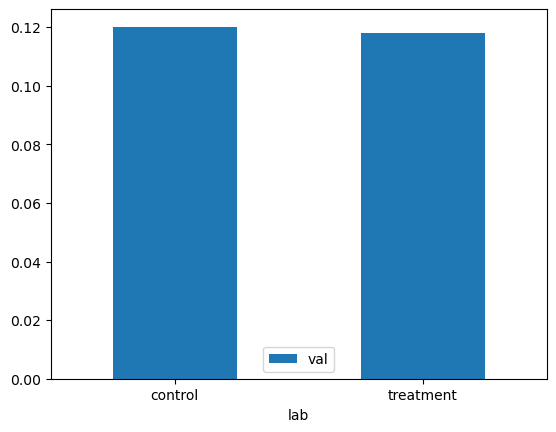

In [10]:

df = pd.DataFrame({'lab':['control', 'treatment'], 'val':[controlConvRate, treatmentConvRate]})
ax = df.plot.bar(x='lab', y='val', rot=0)



### Step 4. Testing the hypothesis

Is the difference in conversion rates between the control and treatment groups statistically significant?

The last step of our analysis is testing our hypothesis. 

Again, Python makes all the calculations very easy. 

**(Part H(i))** (2 pts)  Conduct an appropriate hypothesis test using an appropriate built-in function from Python and output the p-value for your hypothesis test:


In [11]:

count = [controlConvCount, treatmentConvCount]
nobs = [4720, 4720]

sms.proportions_ztest(count , nobs) 


(0.31779393253374205, 0.7506412534450293)

**(Part H(ii))** (1 pts)  Explain any assumptions that are necessary for the hypothesis test you used and why/how you know your data satisfies those assumption(s).

The data is independent (true since the participants in their respectice study groups are independent)
n >= 30, this is true, n = 4720


**(Part I)** (2 pts)  Use a built-in Python function to get a $95\%$ confidence interval for the difference in conversion rates between the new page and the old page.  Again, list any assumptions about the data in using the built-in function you chose.  

In [12]:
sms.proportion_confint(count, nobs, alpha=0.05, method='normal')

(array([0.11085225, 0.1088047 ]), array([0.12940198, 0.12721225]))


### Step 5. Drawing conclusions

**(3 pts)** What do you conclude based on the results of Part H and Part I above?  Comment on both what the p-value AND the confidence interval tells you.    What do you recommend to your team - is the new design considered a success (i.e. should it be implemented or not)?

This data returned a p-value of 61%. This is signifigantly greater than our original alpha of 5%, so we can conclude our origional $H_0$ is correct, the data is statisticly the same (no signifigant statistical difference). 

The confidence interval tells us that. Darn i don't have enough time to look this up. But if I knew what was meant by the output of that function I would know if our data fell within 95% of the data from the mean. If our data did we can be more confident in it since we know it is less likley that it is an outliar.

***
[Back to top](#top)

<a id='p3'></a>

## (10 pts) Problem 3 - Alcohol Content of Red vs White Wine 
***

Load the data in $\texttt{winequality-red.csv}$ and $\texttt{winequality-white.csv}$ into Pandas DataFrames and take a look at the data.  A description of this dataset can be found on [Berkeley's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). 

**Part A (2 pts)** The characteristic that we'll be interested in is the wine's alcohol content.  Create side-by-side boxplots to compare the wine alcohol content for red wine vs white wine based on this sample data.  Include the mean alcohol content for each type of wine in their corresponding boxplot by setting `showmeans=True`. 

In [13]:
wqRed = pd.read_csv("winequality-red.csv", sep=";")
wqWhite = pd.read_csv("winequality-white.csv", sep=";")

wqRed

wqWhite

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Visually it's not clear whether or not the difference is actually significant.  We'd like to test whether there is a statistically significant difference in mean alcohol content between red and white wine.   


**Part C (1 pt)**  State the null and alternative hypotheses:

$H_0$ = red and white wine generally have the same alchohol content

$H_1$ = red and white wine generally have different alchohol contents

**Part C (2 pts)** Conduct an appropriate hypothesis test at a $5\%$ significance level using an appropriate built-in function from Python and output the p-value for your hypothesis test:


In [14]:
redAlcPercents = wqRed['alcohol']
whiteAlcPercents = wqWhite['alcohol']



res = stats.ttest_ind(redAlcPercents,whiteAlcPercents, equal_var=False)
print(f'p-value for two sided test: {res.pvalue:.4f}')


p-value for two sided test: 0.0043


**Part D(1 pt)** What is the conclusion of your test based on your p-value in part C?

Since the p-value 0.43% is <= 5% we can sreject our null hypothesis and say that red and white wine generally have different alchohol contents.

**Part E (1 pt)** Explain any assumptions that are necessary for the hypothesis test you chose and why/how you know your data satisfies those assumption(s).

**Part F (2 pts)** What is the $95\%$ confidence interval for the difference between mean alcohol content in red vs white wine (i.e. for $\mu_{red} - \mu_{white}$)?          (You can use built-in functions to calculate this, but again explain any assumptions that are necessary to use the built-in function you chose).

In [15]:
cm=sms.CompareMeans(sms.stats.DescrStatsW(redAlcPercents), sms.DescrStatsW(dataset2)) cm.tconfint_diff(alpha=0.05, usevar='unequal'))

SyntaxError: unmatched ')' (2475963229.py, line 1)

**Part G(1 pt)** Intepret/explain what the confidence interval values mean in the context of this problem.

***
[Back to top](#top)

<a id='p4'></a>

## (15 pts) Problem 4- Interpreting Confidence Intervals


The following two parts are NOT Related: 

***
**Part A**  (Theory):

Suppose you obtain a 95% confidence interval of $[8.81, 9.82]$ for the mean of some unknown distribution. For each of the following, explain why or why not the situation described is correct, given the technical definition of a 95% confidence interval we went over in class.

**(i) (2 pts)** If you had no other evidence regarding the true mean of the distribution, you could say there is a 95% chance that its true mean falls between 8.81 and 9.82.

**(ii) (2 pts)** If a class of 100 students all construct 95% confidence intervals for the mean of this particular distribution, then we expect about 95 of their CIs to contain the true mean, and about 5 of them to miss the true mean.

**(iii) (2 pts)** There is a 95% probability that any given random variable sampled from this distribution will be between 8.81 and 9.82.

***
**Part B**: Simulation:

The so-called [Chi-squared](https://en.wikipedia.org/wiki/Chi-squared_distribution) distribution is important in several statistical tests.  It's also fairly asymmetric, and thus interesting for investigating confidence intervals.  It is implemented in scipy.stats as [chi2](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.chi2.html). 


In [ ]:
from scipy.stats import chi2

**(i)** (2 pts): Complete the following code cell to plot a histogram of 10,000 random samples from the Chi-squared distribution with degrees of freedom $d=3$. 

In [ ]:
d = 3 
x = chi2.rvs(d, size=10000)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
# TODO 
pd.Series(x).hist(ax=ax, color="steelblue", edgecolor="white", bins=20, density=True)


**(ii)(1 pt)**: Look up the mean and variance of the Chi-squared distribution with degrees of freedom $d=3$ and report them here (you will need these in the next step). 

mean = 3

variance = 6

**(iii)** (5 pts): In this part you'll write a function to investigate the _coverage properties_ of a confidence interval for the mean of the Chi-squared distribution. Complete the following function to randomly sample $m=500$ sample means with sample size $n=100$ for the Chi-squared distribution with 3 degrees of freedom.  For each random sample, compute the 95% confidence interval for the mean.  Your function should do two things: 

1. Report the proportion of confidence intervals that successfully cover the true mean of the distribution 
2. Make a plot of 50 randomly selected confidence intervals. Overlay the intervals on the line $y=\mu$ where $\mu$ is the true mean of the distribution. Color confidence intervals black if they cover the true mean, and red if they don't.  

In [ ]:
def confidence_intervals(m=500, n=100):
    # TODO 

**(iv)**(1 pt): Does the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class?  Explain. 